## Packages

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model                         # para calcular el modelo de regresion polinomial
import statsmodels.formula.api as smf
import statsmodels.api as sm                              # pruebas estadisticas
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd   
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing


## Dataset

In [193]:
db = np.load('data.npy', allow_pickle=True).item()

In [194]:
# Segmentacion de datos

training_set = db['training_set']           # Observaciones Entrenamiento
testing_set = db['testing_set']             # Observaciones de prueba

In [195]:
# caractetisticas de los dataset

print("training set : ", training_set.shape)
print("testing set : ", testing_set.shape)
print("Numero de dias festivos : ", len(training_set[training_set[:, 4] == 1, :]))
print("Numero de dias ordinarios : ", len(training_set[training_set[:, 4] == 0, :]))

training set :  (500, 10)
testing set :  (5, 1)
Numero de dias festivos :  13
Numero de dias ordinarios :  487


In [196]:
X_holidays = training_set[training_set[:, 4] == 1, :]            # Extracion solo de registros holidays.
y_holidays = X_holidays[:, np.newaxis, 7]                        
X_holidays = X_holidays[:, np.newaxis, 6]  

X = training_set[:, np.newaxis, 6]                               # Incluye todos los datos.
y = training_set[:, np.newaxis, 7]

df = np.concatenate((X,y),axis = 1)                              # Contatenamos Columnas en una unica matrix


df_X = pd.DataFrame(X, columns = ['Independiente'])
df_y = pd.DataFrame(y, columns= ['Dependiente'])

df = pd.DataFrame(df, columns = ['Independiente','Dependiente'])


In [197]:
y

array([[3.050e+02],
       [1.156e+03],
       [2.140e+02],
       [1.022e+03],
       [1.173e+03],
       [2.840e+02],
       [2.170e+02],
       [1.612e+03],
       [1.004e+03],
       [8.980e+02],
       [6.650e+02],
       [9.980e+02],
       [8.980e+02],
       [7.630e+02],
       [3.620e+02],
       [1.118e+03],
       [3.490e+02],
       [1.603e+03],
       [2.235e+03],
       [4.770e+02],
       [1.140e+03],
       [1.340e+03],
       [2.521e+03],
       [2.355e+03],
       [2.540e+02],
       [1.965e+03],
       [1.017e+03],
       [6.630e+02],
       [2.530e+02],
       [3.770e+02],
       [8.150e+02],
       [3.590e+02],
       [8.330e+02],
       [1.077e+03],
       [7.630e+02],
       [1.338e+03],
       [6.760e+02],
       [1.829e+03],
       [6.800e+01],
       [9.400e+01],
       [7.340e+02],
       [1.363e+03],
       [1.424e+03],
       [1.483e+03],
       [2.060e+02],
       [2.001e+03],
       [2.290e+03],
       [1.252e+03],
       [4.100e+02],
       [3.400e+02],


In [198]:
scaler = preprocessing.MinMaxScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)
X_holidays = scaler.fit_transform(X_holidays)
y_holidays = scaler.fit_transform(y_holidays)

<function matplotlib.pyplot.show(close=None, block=None)>

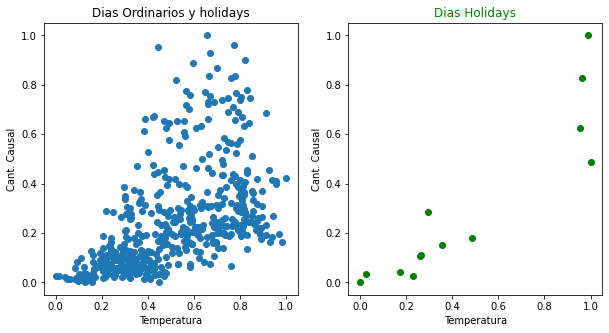

In [199]:
# Visualización de información

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("Dias Ordinarios y holidays")
ax1.set_xlabel("Temperatura")
ax1.set_ylabel("Cant. Causal")
ax2.set_title("Dias Holidays", c="green")
ax2.set_xlabel("Temperatura")
ax2.set_ylabel("Cant. Causal")
ax1.scatter(X, y)
ax2.scatter(X_holidays, y_holidays, c="green")
plt.show

## Modelo de regresion lineal simple

<function matplotlib.pyplot.show(close=None, block=None)>

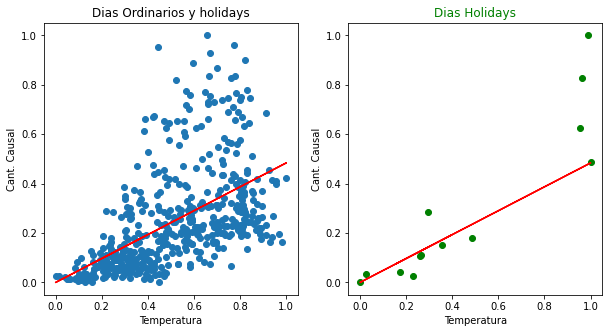

In [200]:
# Modelo regresion lineal simple

modelo_rl = sm.OLS(y, X).fit()

y_pred_rl = modelo_rl.predict(X)

# Visualización de información

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("Dias Ordinarios y holidays")
ax1.set_xlabel("Temperatura")
ax1.set_ylabel("Cant. Causal")
ax2.set_title("Dias Holidays", c="green")
ax2.set_xlabel("Temperatura")
ax2.set_ylabel("Cant. Causal")
ax1.scatter(X, y)
ax1.plot(X,y_pred_rl,c="red")
ax2.scatter(X_holidays, y_holidays, c="green")
ax2.plot(X,y_pred_rl,c="red")
plt.show


In [201]:
print(modelo_rl.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              1210.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                   1.78e-135
Time:                        17:38:21   Log-Likelihood:                          157.38
No. Observations:                 500   AIC:                                     -312.8
Df Residuals:                     499   BIC:                                     -308.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Modelo de regresion linea polinomico

In [202]:
# Definición del grado del polinomio

poli_reg = PolynomialFeatures(degree=2)

# Trasformacion de caracteristicas de mayor grado

Xp = poli_reg.fit_transform(X)
Xp.shape


(500, 3)

y_pred_p shape =  (500,)


<function matplotlib.pyplot.show(close=None, block=None)>

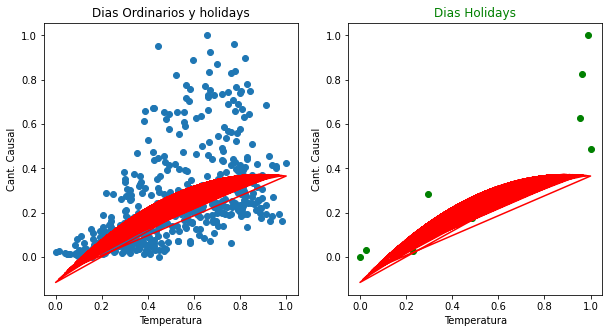

In [203]:
# Modelo regresion lineal simple

modelo_p = sm.OLS(y, Xp).fit()

y_pred_p = modelo_p.predict(Xp)

print('y_pred_p shape = ', y_pred_p.shape )

# Visualización de información

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("Dias Ordinarios y holidays")
ax1.set_xlabel("Temperatura")
ax1.set_ylabel("Cant. Causal")
ax2.set_title("Dias Holidays", c="green")
ax2.set_xlabel("Temperatura")
ax2.set_ylabel("Cant. Causal")
ax1.scatter(X, y)
ax1.plot(X,y_pred_p,c="red")
ax2.scatter(X_holidays, y_holidays, c="green")
ax2.plot(X,y_pred_p,c="red")
plt.show


In [204]:
print(modelo_p.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           3.68e-39
Time:                        17:38:39   Log-Likelihood:                 165.93
No. Observations:                 500   AIC:                            -325.9
Df Residuals:                     497   BIC:                            -313.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1137      0.036     -3.168      0.0

Resultados

# Modelo de regresion lineal simple: se obtiene el 70% de los datos explicados
# Modelo de regresion lineal poli: solo se logre el 30% de los datos explicados. a pesar que se utilizan diferentes grados la presición del modelo no supera el 30%